In [ ]:
import pandas as pd
dynamic_data = pd.read_csv('/Users/changjiangeng/Desktop/assignment2_data_final/sph_dynamic.csv')
dynamic_data.head()

,stay_id,charttime,total_protein,calcium,creatinine,glucose,sodium,chloride,heart_rate,sbp,...,ph,lactate,pt,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal
0,35715575,2148-12-27 18:15:00.000,NaN,8.5,0.9,137.0,138.0,104.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34483718,2118-01-04 03:58:00.000,NaN,8.2,0.8,129.0,141.0,101.0,NaN,NaN,...,NaN,NaN,12.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31826892,2163-03-10 19:59:00.000,NaN,7.7,0.4,112.0,136.0,98.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,36154799,2131-12-02 19:14:00.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32732521,2116-08-12 12:45:00.000,NaN,NaN,4.0,135.0,139.0,105.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dynamic_data.groupby('stay_id').cumcount().describe()

count    7024.000000
mean        9.731919
std        22.808797
min         0.000000
25%         0.000000
50%         2.000000
75%         8.000000
max       195.000000
dtype: float64

In [ ]:
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing

from sklearn.metrics import roc_auc_score

import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn import preprocessing

#load data
X = pd.read_csv('/Users/changjiangeng/Desktop/assignment2_data_final/sph_dynamic.csv')
Y=pd.read_csv(r"/Users/changjiangeng/Desktop/assignment2_data_final/sph_static.csv")
Y_total=pd.read_csv(r"/Users/changjiangeng/Desktop/assignment2_data_final/sph_static_final.csv")
'''
X.head()
len(X)
X.isna().sum()
'''
drop_column = ['total_protein','heart_rate','sbp','dbp','mbp','resp_rate','temperature','bilirubin_direct','bilirubin_indirect',
              'ph','lactate','urineoutput','sofa_respiration','sofa_coagulation','sofa_liver','sofa_cardiovascular','sofa_cns',
              'sofa_renal']
drop_column1=['icu_intime','vent_start','vent_end']
new_dynmaic = X.drop(columns = drop_column)
new_dynmaic.head()


#data merge
Xset=new_dynmaic.groupby('stay_id').mean()
Yset=Y_total.drop(columns=drop_column1)
data0=pd.merge(Xset,Yset,on='stay_id')

#difinite features and target
target=pd.DataFrame(data0['vent_duration'])
target6=pd.DataFrame(data0['vent_duration_group_in_hours_3_day'])
targetd=pd.DataFrame(data0['vent_duration_group_in_days'])
features=data0.drop(columns=['vent_duration','stay_id','vent_duration_group_in_days','vent_duration_group_in_hours_3_day'])

#impute and scale
Xc=features.columns
#data0 = data0.fillna(data0.mean())
#imputer = KNNImputer(n_neighbors=6, weights='uniform', metric='nan_euclidean')
#imputer.fit(features)
#features =features.fillna(features.mean())
features= pd.DataFrame(KNNImputer(n_neighbors=6, weights='uniform', metric='nan_euclidean').fit_transform(features)) 
features=pd.DataFrame(preprocessing.normalize(features))
#data0 = pd.DataFrame(preprocessing.normalize(data0))
target=target.fillna(target.mean())

#features= pd.DataFrame(KNN(k=6).fit_transform(features)) 
features.columns=Xc

#split dataset
trainX, testX, trainY, testY = train_test_split(features, target, random_state=3, test_size=0.2)
trainX6, testX6, trainY6, testY6 = train_test_split(features, target6, random_state=3, test_size=0.2)
trainXd, testXd, trainYd, testYd = train_test_split(features, targetd, random_state=3, test_size=0.2)


#build up the model
models = {
    "linear":LinearRegression(),
    "dtr": DecisionTreeRegressor(),
    "rfr": RandomForestRegressor(),
    "svr": SVR(),
    "xgbr": xgb.XGBRegressor()
}



In [ ]:
print(target6.shape)

(1923, 1)


In [ ]:
print(X.shape)

(7024, 32)


In [ ]:
#trainX = trainX.fillna(trainX.mean())
trainX.isna().sum()
#testX=testX.fillna(testX.mean())
#features =features.fillna(features.mean())
#target=target.fillna(target.mean())
#new_dynmaic=new_dynmaic.fillna(new_dynmaic.mean())

calcium            0
creatinine         0
glucose            0
sodium             0
chloride           0
hemoglobin         0
wbc                0
alt                0
ast                0
alp                0
bilirubin_total    0
pt                 0
dtype: int64

In [ ]:
features.isna().sum()

calcium            0
creatinine         0
glucose            0
sodium             0
chloride           0
hemoglobin         0
wbc                0
alt                0
ast                0
alp                0
bilirubin_total    0
pt                 0
dtype: int64

In [ ]:
drop_column = ['total_protein','heart_rate','sbp','dbp','mbp','resp_rate','temperature','bilirubin_direct','bilirubin_indirect',
              'ph','lactate','urineoutput','sofa_respiration','sofa_coagulation','sofa_liver','sofa_cardiovascular','sofa_cns',
              'sofa_renal']
for i in drop_column:
    heart=X[['stay_id',i]]
    heart_new=heart.groupby('stay_id').mean()
    print(len(Yset)-heart_new.isna().sum())

total_protein    79
dtype: int64
heart_rate    183
dtype: int64
sbp    125
dtype: int64
dbp    125
dtype: int64
mbp    132
dtype: int64
resp_rate    184
dtype: int64
temperature    48
dtype: int64
bilirubin_direct    134
dtype: int64
bilirubin_indirect    134
dtype: int64
ph    20
dtype: int64
lactate    12
dtype: int64
urineoutput    79
dtype: int64
sofa_respiration    17
dtype: int64
sofa_coagulation    1
dtype: int64
sofa_liver    1
dtype: int64
sofa_cardiovascular    147
dtype: int64
sofa_cns    44
dtype: int64
sofa_renal    0
dtype: int64


In [ ]:
heart1=X[['stay_id','heart_rate','resp_rate']]

In [ ]:
#consider to add heart_rate and resp_rate in (which has medical relation with inbutation time)
heart_res=heart1.dropna()
#heart_res.head()
#heart_res.info()
data2=pd.merge(data0,heart_res,on='stay_id')
target_new=pd.DataFrame(data2['vent_duration'])
target_new6=pd.DataFrame(data2['vent_duration_group_in_hours_3_day'])
target_newd=pd.DataFrame(data2['vent_duration_group_in_days'])
#features_new=pd.DataFrame(data2['calcium','creatinine','glucose','sodium','chloride','hemoglobin','wbc','alt','ast','alp','bilirubin_total','pt','heart_rate','resp_rate'])
features_new= data2.drop(columns=['vent_duration','stay_id','vent_duration_group_in_days','vent_duration_group_in_hours_3_day'])
features_new.info()

#impute
Xc=features_new.columns

imputer = KNNImputer(n_neighbors=6, weights='uniform', metric='nan_euclidean')
imputer.fit(features_new) 
features_new.columns=Xc
features_new =features_new.fillna(features_new.mean())
features_new.info()
#split dataset
trainX_new, testX_new, trainY_new, testY_new = train_test_split(features_new, target_new, random_state=3, test_size=0.2)
trainX_new6, testX_new6, trainY_new6, testY_new6 = train_test_split(features_new, target_new6, random_state=3, test_size=0.2)
trainX_newd, testX_newd, trainY_newd, testY_newd = train_test_split(features_new, target_newd, random_state=3, test_size=0.2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   calcium          174 non-null    float64
 1   creatinine       184 non-null    float64
 2   glucose          182 non-null    float64
 3   sodium           184 non-null    float64
 4   chloride         185 non-null    float64
 5   hemoglobin       176 non-null    float64
 6   wbc              177 non-null    float64
 7   alt              122 non-null    float64
 8   ast              122 non-null    float64
 9   alp              120 non-null    float64
 10  bilirubin_total  122 non-null    float64
 11  pt               158 non-null    float64
 12  heart_rate       185 non-null    float64
 13  resp_rate        185 non-null    float64
dtypes: float64(14)
memory usage: 21.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 184
Data columns (total 14 columns):
 #   Column 

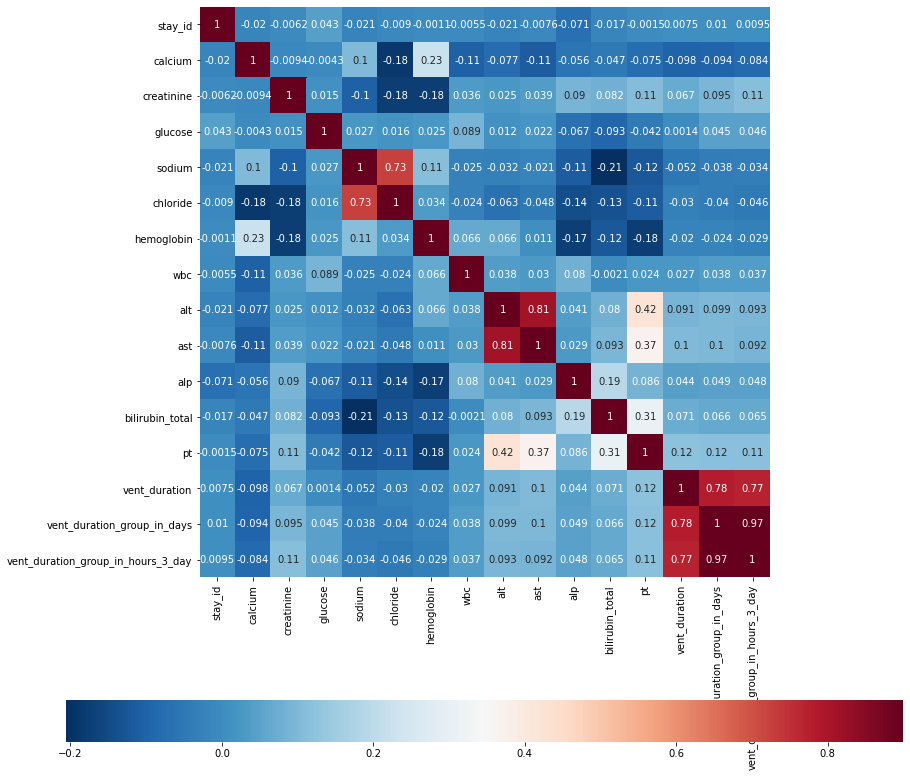

In [ ]:
# filling the nan by using mean
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from torch import nn
from torch.utils import data
import seaborn as sns
from model import Transformer, Coder

#corrmat = features_new.corr()
correlation = data0.corr()
plt.subplots(figsize=(15,15))
sns.heatmap(correlation, vmax=0.9, square=True, annot=True,cmap="RdBu_r",
                      cbar_kws={"orientation":"horizontal"})
plt.savefig('corr.png')
plt.show()

In [ ]:
all_features = pd.get_dummies(features, dummy_na=True)
print(all_features.shape)
print(all_features)

(1923, 12)
       calcium  creatinine   glucose    sodium  chloride  hemoglobin  \
0     0.019821    0.001875  0.330796  0.361599  0.274547    0.033214   
1     0.024662    0.018777  0.114903  0.389548  0.280250    0.025783   
2     0.019793    0.002359  0.321147  0.351296  0.275269    0.026478   
3     0.031026    0.005664  0.424837  0.505942  0.391365    0.029610   
4     0.017638    0.000953  0.316999  0.331300  0.252646    0.025750   
...        ...         ...       ...       ...       ...         ...   
1918  0.039248    0.009217  0.588713  0.587226  0.432615    0.051587   
1919  0.035718    0.005129  0.508669  0.598434  0.440277    0.049157   
1920  0.041710    0.023912  0.543447  0.563827  0.399434    0.049997   
1921  0.034283    0.026336  0.504024  0.631165  0.467698    0.046316   
1922  0.035997    0.003974  0.582023  0.605397  0.467488    0.031789   

           wbc       alt       ast       alp  bilirubin_total        pt  
0     0.013259  0.394843  0.648160  0.324792      

In [ ]:
len(data0)

1923

In [ ]:
import torch
import torch.nn as nn
from timm.models.layers import DropPath, to_2tuple, trunc_normal_

class Coder(nn.Module):
    def __init__(self, in_feature_size, hidden_feature_size = None, activation=nn.GELU, drop_rate=0., encoder_flag=True):
        super().__init__()
        self.query = nn.Linear(in_feature_size, in_feature_size)
        self.key = nn.Linear(in_feature_size, in_feature_size)
        self.value = nn.Linear(in_feature_size, in_feature_size)
        self.fc1 = nn.Linear(in_feature_size, hidden_feature_size)
        self.act = activation()
        self.encoder = encoder_flag
        if self.encoder==True:
            self.fc2 = nn.Linear(hidden_feature_size,1)
        else:
            self.fc2 = nn.Linear(hidden_feature_size, in_feature_size)
        self.drop = nn.Dropout(drop_rate)

    def forward(self, x):
        x0 = x
        q = self.query(x).unsqueeze(2)
        k = self.key(x).unsqueeze(2)
        v = self.value(x).unsqueeze(2)
        attention = (q @ k.transpose(-2, -1))
        attention = attention.softmax(dim=-1)
        x = (attention @ v).squeeze(2)
        x += x0
        x1 = x
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        if self.encoder==False:
            x += x1

        x = x.squeeze(0)

        return x


class Transformer(nn.Module):
    def __init__(self, in_feature_size, drop=0.):
        super().__init__()
        self.Encoder = Coder(in_feature_size=in_feature_size, hidden_feature_size=256, activation=nn.GELU, drop_rate=drop, encoder_flag=False)
        self.Decoder = Coder(in_feature_size=in_feature_size, hidden_feature_size=256, activation=nn.GELU, drop_rate=drop, encoder_flag=True)

    def forward(self, x):
        return self.Decoder(self.Encoder(x))

In [ ]:
#G1 knn fit training progress
device='cpu'
#trainX, testX, trainY, testY = train_test_split(all_features, target, random_state=3, test_size=0.2)
#trainX6, testX6, trainY6, testY6 = train_test_split(all_features, target6, random_state=3, test_size=0.2)
#trainXd, testXd, trainYd, testYd = train_test_split(all_features, targetd, random_state=3, test_size=0.2)


train_features = torch.tensor(trainX.values, dtype=torch.float32).to(device)
test_features = torch.tensor(testX.values, dtype=torch.float32).to(device)
train_labels = torch.tensor(trainY.values, dtype=torch.float32).to(device)
test_labels = torch.tensor(testY.values, dtype=torch.float32).to(device)
loss = nn.MSELoss()
features_size = train_features.shape[1]
print(features_size)
print(train_features)
print(train_labels)
model = Transformer(in_feature_size=features_size, drop=0.).to(device)
from sklearn import metrics
def evaluate_rmse(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test.cpu().detach().numpy(), y_pred.cpu().detach().numpy()))

num_epochs, lr, weight_decay, batch_size = 10000, 0.002, 2, 64
print(train_features.size())
dataset = data.TensorDataset(train_features, train_labels)
train_iter = data.DataLoader(dataset, batch_size)
optimizer = torch.optim.Adam(model.parameters(), lr=lr,
                                 weight_decay=weight_decay)
validate_ls = []
rmse = 10000000
best_epoch = 0
for epoch in range(num_epochs):
    for X,y in train_iter:
        #print(X)
        optimizer.zero_grad()
        l = loss(model(X), y)
        l.backward()
        optimizer.step()
    with torch.no_grad():
        y_pred = model(train_features)
        train_rmse = evaluate_rmse(train_labels, y_pred)
        if epoch%100==0:
            print("epoch is {} the train RMSE is: {}".format(epoch,train_rmse))
        y_pred = model(test_features)
        new_rmse = evaluate_rmse(test_labels, y_pred)
        validate_ls.append(new_rmse)
        if rmse>new_rmse:
            rmse = new_rmse
        #print("epoch is {} the test RMSE is: {}".format(epoch,new_rmse))
print("the RMSE is: {}".format(rmse))

12
tensor([[0.0379, 0.0040, 0.5703,  ..., 0.3988, 0.0016, 0.0459],
        [0.0339, 0.0044, 0.4197,  ..., 0.2838, 0.0020, 0.0588],
        [0.0382, 0.0025, 0.5580,  ..., 0.3105, 0.0009, 0.0691],
        ...,
        [0.0412, 0.0177, 0.2869,  ..., 0.4291, 0.0040, 0.0709],
        [0.0319, 0.0072, 0.7571,  ..., 0.1967, 0.0119, 0.0744],
        [0.0278, 0.0031, 0.4372,  ..., 0.2525, 0.0031, 0.0483]])
tensor([[ 9.0000],
        [11.6000],
        [ 6.9000],
        ...,
        [44.0000],
        [ 9.4500],
        [71.5500]])
torch.Size([1538, 12])
epoch is 0 the train RMSE is: 58.59845733642578
epoch is 100 the train RMSE is: 58.174259185791016
epoch is 200 the train RMSE is: 57.9936637878418
epoch is 300 the train RMSE is: 57.925376892089844
epoch is 400 the train RMSE is: 57.88119888305664
epoch is 500 the train RMSE is: 57.862274169921875
epoch is 600 the train RMSE is: 57.849246978759766
epoch is 700 the train RMSE is: 57.83847427368164
epoch is 800 the train RMSE is: 57.828754425048

In [ ]:
#G1 mean training progress
device='cpu'
trainX, testX, trainY, testY = train_test_split(all_features, target, random_state=3, test_size=0.2)
trainX6, testX6, trainY6, testY6 = train_test_split(all_features, target6, random_state=3, test_size=0.2)
trainXd, testXd, trainYd, testYd = train_test_split(all_features, targetd, random_state=3, test_size=0.2)


train_features = torch.tensor(trainX.values, dtype=torch.float32).to(device)
test_features = torch.tensor(testX.values, dtype=torch.float32).to(device)
train_labels = torch.tensor(trainY.values, dtype=torch.float32).to(device)
test_labels = torch.tensor(testY.values, dtype=torch.float32).to(device)
loss = nn.MSELoss()
features_size = train_features.shape[1]
print(features_size)
print(train_features)
print(train_labels)
model = Transformer(in_feature_size=features_size, drop=0.).to(device)
from sklearn import metrics
def evaluate_rmse(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test.cpu().detach().numpy(), y_pred.cpu().detach().numpy()))

num_epochs, lr, weight_decay, batch_size = 10000, 0.002, 2, 64
print(train_features.size())
dataset = data.TensorDataset(train_features, train_labels)
train_iter = data.DataLoader(dataset, batch_size)
optimizer = torch.optim.Adam(model.parameters(), lr=lr,
                                 weight_decay=weight_decay)
validate_ls = []
rmse = 10000000
best_epoch = 0
for epoch in range(num_epochs):
    for X,y in train_iter:
        #print(X)
        optimizer.zero_grad()
        l = loss(model(X), y)
        l.backward()
        optimizer.step()
    with torch.no_grad():
        y_pred = model(train_features)
        train_rmse = evaluate_rmse(train_labels, y_pred)
        if epoch%100==0:
            print("epoch is {} the train RMSE is: {}".format(epoch,train_rmse))
        y_pred = model(test_features)
        new_rmse = evaluate_rmse(test_labels, y_pred)
        validate_ls.append(new_rmse)
        if rmse>new_rmse:
            rmse = new_rmse
        #print("epoch is {} the test RMSE is: {}".format(epoch,new_rmse))
print("the RMSE is: {}".format(rmse))


12
tensor([[0.0379, 0.0040, 0.5703,  ..., 0.3988, 0.0016, 0.0459],
        [0.0334, 0.0044, 0.4197,  ..., 0.2838, 0.0020, 0.0588],
        [0.0382, 0.0025, 0.5577,  ..., 0.3103, 0.0009, 0.0775],
        ...,
        [0.0412, 0.0177, 0.2869,  ..., 0.4291, 0.0040, 0.0709],
        [0.0319, 0.0072, 0.7571,  ..., 0.1967, 0.0119, 0.0744],
        [0.0278, 0.0031, 0.4372,  ..., 0.2525, 0.0031, 0.0483]])
tensor([[ 9.0000],
        [11.6000],
        [ 6.9000],
        ...,
        [44.0000],
        [ 9.4500],
        [71.5500]])
torch.Size([1538, 12])
epoch is 0 the train RMSE is: 70.0096664428711
epoch is 100 the train RMSE is: 58.36367416381836
epoch is 200 the train RMSE is: 58.269718170166016
epoch is 300 the train RMSE is: 58.02665328979492
epoch is 400 the train RMSE is: 57.761592864990234
epoch is 500 the train RMSE is: 57.691898345947266
epoch is 600 the train RMSE is: 57.65397644042969
epoch is 700 the train RMSE is: 57.614173889160156
epoch is 800 the train RMSE is: 57.561332702636

In [ ]:
item = targetd.values.max()
item

4

In [ ]:
import torch
import torch.nn as nn
from timm.models.layers import DropPath, to_2tuple, trunc_normal_

class Coder(nn.Module):
    def __init__(self, in_feature_size, hidden_feature_size = None, activation=nn.ReLU, drop_rate=0., encoder_flag=True):
        super().__init__()
        self.query = nn.Linear(in_feature_size, in_feature_size)
        self.key = nn.Linear(in_feature_size, in_feature_size)
        self.value = nn.Linear(in_feature_size, in_feature_size)
        self.fc1 = nn.Linear(in_feature_size, hidden_feature_size)
        self.act = activation()
        self.encoder = encoder_flag
        if self.encoder==True:
            self.fc2 = nn.Linear(hidden_feature_size,13)
        else:
            self.fc2 = nn.Linear(hidden_feature_size, in_feature_size)
        self.drop = nn.Dropout(drop_rate)

    def forward(self, x):
        x0 = x
        q = self.query(x).unsqueeze(2)
        k = self.key(x).unsqueeze(2)
        v = self.value(x).unsqueeze(2)
        attention = (q @ k.transpose(-2, -1))
        attention = attention.softmax(dim=-1)
        x = (attention @ v).squeeze(2)
        x += x0
        x1 = x
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        if self.encoder==False:
            x += x1

        x = x.squeeze(0)

        return x


class Transformer(nn.Module):
    def __init__(self, in_feature_size, drop=0.):
        super().__init__()
        self.Encoder = Coder(in_feature_size=in_feature_size, hidden_feature_size=256, activation=nn.ReLU, drop_rate=drop, encoder_flag=False)
        self.Decoder = Coder(in_feature_size=in_feature_size, hidden_feature_size=256, activation=nn.ReLU, drop_rate=drop, encoder_flag=True)

    def forward(self, x):
        return self.Decoder(self.Encoder(x))

In [ ]:
#G1 knn fit training progress
device='cpu'
import warnings
warnings.filterwarnings('ignore')
train_features = torch.tensor(trainX6.values, dtype=torch.float32).to(device)
test_features = torch.tensor(testX6.values, dtype=torch.float32).to(device)
train_labels = torch.tensor(trainY6.values, dtype=torch.float32).to(device)
test_labels = torch.tensor(testY6.values, dtype=torch.float32).to(device)

loss = nn.MSELoss()
features_size = train_features.shape[1]
print(features_size)
print(train_features)
print(train_labels)
model = Transformer(in_feature_size=features_size, drop=0.).to(device)
from sklearn import metrics
def evaluate_rmse(y_test, y_pred):
    #print(y_test.cpu().detach().numpy())
    #print(y_pred.cpu().detach().numpy())
    return np.sqrt(metrics.mean_squared_error(y_test.cpu().detach().numpy(), np.max(y_pred.cpu().detach().numpy(),axis=1)))

num_epochs, lr, weight_decay, batch_size = 10000, 0.002, 2, 64
print(train_features.size())
dataset = data.TensorDataset(train_features, train_labels)
train_iter = data.DataLoader(dataset, batch_size)
optimizer = torch.optim.Adam(model.parameters(), lr=lr,
                                 weight_decay=weight_decay)
validate_ls = []
rmse = 10000000
best_epoch = 0
for epoch in range(num_epochs):
    for X,y in train_iter:
        #print(X)
        optimizer.zero_grad()
        l = loss(model(X), y)
        l.backward()
        optimizer.step()
    with torch.no_grad():
        y_pred = model(train_features)
        
        train_rmse = evaluate_rmse(train_labels, y_pred)
        if epoch%100==0:
            print("epoch is {} the train RMSE is: {}".format(epoch,train_rmse))
        y_pred = model(test_features)
        new_rmse = evaluate_rmse(test_labels, y_pred)
        validate_ls.append(new_rmse)
        if rmse>new_rmse:
            rmse = new_rmse
        #print("epoch is {} the test RMSE is: {}".format(epoch,new_rmse))
print("the RMSE is: {}".format(rmse))

12
tensor([[0.0379, 0.0040, 0.5703,  ..., 0.3988, 0.0016, 0.0459],
        [0.0339, 0.0044, 0.4197,  ..., 0.2838, 0.0020, 0.0588],
        [0.0382, 0.0025, 0.5580,  ..., 0.3105, 0.0009, 0.0691],
        ...,
        [0.0412, 0.0177, 0.2869,  ..., 0.4291, 0.0040, 0.0709],
        [0.0319, 0.0072, 0.7571,  ..., 0.1967, 0.0119, 0.0744],
        [0.0278, 0.0031, 0.4372,  ..., 0.2525, 0.0031, 0.0483]])
tensor([[ 2.],
        [ 2.],
        [ 2.],
        ...,
        [ 8.],
        [ 2.],
        [12.]])
torch.Size([1538, 12])
epoch is 0 the train RMSE is: 4.339484691619873
epoch is 100 the train RMSE is: 4.152427673339844
epoch is 200 the train RMSE is: 4.170858383178711
epoch is 300 the train RMSE is: 4.1771159172058105
epoch is 400 the train RMSE is: 4.17253303527832
epoch is 500 the train RMSE is: 4.175784587860107
epoch is 600 the train RMSE is: 4.162569999694824
epoch is 700 the train RMSE is: 4.173601150512695
epoch is 800 the train RMSE is: 4.170406818389893
epoch is 900 the train R

In [ ]:
#training progress
import warnings
warnings.filterwarnings('ignore')
device='cpu'
trainX, testX, trainY, testY = train_test_split(all_features, target, random_state=3, test_size=0.2)
trainX6, testX6, trainY6, testY6 = train_test_split(all_features, target6, random_state=3, test_size=0.2)
trainXd, testXd, trainYd, testYd = train_test_split(all_features, targetd, random_state=3, test_size=0.2)

train_features = torch.tensor(trainX6.values, dtype=torch.float32).to(device)
test_features = torch.tensor(testX6.values, dtype=torch.float32).to(device)
train_labels = torch.tensor(trainY6.values, dtype=torch.float32).to(device)
test_labels = torch.tensor(testY6.values, dtype=torch.float32).to(device)
loss = nn.MSELoss()
features_size = train_features.shape[1]
print(features_size)
print(train_features)
print(train_labels)
model = Transformer(in_feature_size=features_size, drop=0.).to(device)
from sklearn import metrics
def evaluate_rmse(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test.cpu().detach().numpy(), np.max(y_pred.cpu().detach().numpy(),axis=1)))

num_epochs, lr, weight_decay, batch_size = 10000, 0.04, 2, 128
print(train_features.size())
dataset = data.TensorDataset(train_features, train_labels)
train_iter = data.DataLoader(dataset, batch_size)
optimizer = torch.optim.Adam(model.parameters(), lr=lr,
                                 weight_decay=weight_decay)
validate_ls = []
rmse = 10000000
best_epoch = 0
for epoch in range(num_epochs):
    for X,y in train_iter:
        #print(X)
        optimizer.zero_grad()
        l = loss(model(X), y)
        l.backward()
        optimizer.step()
    with torch.no_grad():
        y_pred = model(train_features)
        train_rmse = evaluate_rmse(train_labels, y_pred)
        if epoch%100==0:
            print("epoch is {} the train RMSE is: {}".format(epoch,train_rmse))
        y_pred = model(test_features)
        new_rmse = evaluate_rmse(test_labels, y_pred)
        validate_ls.append(new_rmse)
        if rmse>new_rmse:
            rmse = new_rmse
        #print("epoch is {} the test RMSE is: {}".format(epoch,new_rmse))
print("the RMSE is: {}".format(rmse))

12
tensor([[0.0379, 0.0040, 0.5703,  ..., 0.3988, 0.0016, 0.0459],
        [0.0334, 0.0044, 0.4197,  ..., 0.2838, 0.0020, 0.0588],
        [0.0382, 0.0025, 0.5577,  ..., 0.3103, 0.0009, 0.0775],
        ...,
        [0.0412, 0.0177, 0.2869,  ..., 0.4291, 0.0040, 0.0709],
        [0.0319, 0.0072, 0.7571,  ..., 0.1967, 0.0119, 0.0744],
        [0.0278, 0.0031, 0.4372,  ..., 0.2525, 0.0031, 0.0483]])
tensor([[ 2.],
        [ 2.],
        [ 2.],
        ...,
        [ 8.],
        [ 2.],
        [12.]])
torch.Size([1538, 12])
epoch is 0 the train RMSE is: 4.362680912017822
epoch is 100 the train RMSE is: 6.734435558319092
epoch is 200 the train RMSE is: 4.57859992980957
epoch is 300 the train RMSE is: 4.447348117828369
epoch is 400 the train RMSE is: 4.489156723022461
epoch is 500 the train RMSE is: 4.84108829498291
epoch is 600 the train RMSE is: 4.256268501281738
epoch is 700 the train RMSE is: 5.0891828536987305
epoch is 800 the train RMSE is: 5.175208568572998
epoch is 900 the train RM

In [ ]:
targetd.min()

vent_duration_group_in_days    1
dtype: int64

In [ ]:
import torch
import torch.nn as nn
from timm.models.layers import DropPath, to_2tuple, trunc_normal_

class Coder(nn.Module):
    def __init__(self, in_feature_size, hidden_feature_size = None, activation=nn.GELU, drop_rate=0., encoder_flag=True):
        super().__init__()
        self.query = nn.Linear(in_feature_size, in_feature_size)
        self.key = nn.Linear(in_feature_size, in_feature_size)
        self.value = nn.Linear(in_feature_size, in_feature_size)
        self.fc1 = nn.Linear(in_feature_size, hidden_feature_size)
        self.act = activation()
        self.encoder = encoder_flag
        if self.encoder==True:
            self.fc2 = nn.Linear(hidden_feature_size,4)
        else:
            self.fc2 = nn.Linear(hidden_feature_size, in_feature_size)
        self.drop = nn.Dropout(drop_rate)

    def forward(self, x):
        x0 = x
        q = self.query(x).unsqueeze(2)
        k = self.key(x).unsqueeze(2)
        v = self.value(x).unsqueeze(2)
        attention = (q @ k.transpose(-2, -1))
        attention = attention.softmax(dim=-1)
        x = (attention @ v).squeeze(2)
        x += x0
        x1 = x
        x = self.fc1(x)
        x = self.act(x)
        x = self.drop(x)
        x = self.fc2(x)
        x = self.drop(x)
        if self.encoder==False:
            x += x1

        x = x.squeeze(0)

        return x


class Transformer(nn.Module):
    def __init__(self, in_feature_size, drop=0.):
        super().__init__()
        self.Encoder = Coder(in_feature_size=in_feature_size, hidden_feature_size=512, activation=nn.Sigmoid, drop_rate=drop, encoder_flag=False)
        self.Decoder = Coder(in_feature_size=in_feature_size, hidden_feature_size=512, activation=nn.Sigmoid, drop_rate=drop, encoder_flag=True)

    def forward(self, x):
        return self.Decoder(self.Encoder(x))

In [ ]:
(trainYd.values-1).max()

3

In [ ]:
#training progress
import warnings
warnings.filterwarnings('ignore')
device='cpu'
#trainX, testX, trainY, testY = train_test_split(all_features, target, random_state=3, test_size=0.2)
#trainX6, testX6, trainY6, testY6 = train_test_split(all_features, target6, random_state=3, test_size=0.2)
#trainXd, testXd, trainYd, testYd = train_test_split(all_features, targetd, random_state=3, test_size=0.2)


train_features = torch.tensor(trainXd.values, dtype=torch.float32).to(device)
test_features = torch.tensor(testXd.values, dtype=torch.float32).to(device)
train_labels = torch.tensor(trainYd.values-1, dtype=torch.float32).to(device)
test_labels = torch.tensor(testYd.values-1, dtype=torch.float32).to(device)
loss = nn.MSELoss()
features_size = train_features.shape[1]
print(features_size)
print(train_features)
print(train_labels)
model = Transformer(in_feature_size=features_size, drop=0.).to(device)
from sklearn import metrics
def evaluate_rmse(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test.cpu().detach().numpy(), np.max(y_pred.cpu().detach().numpy(),axis=1)))

num_epochs, lr, weight_decay, batch_size = 1000, 0.0001, 2, 32
print(train_features.size())
dataset = data.TensorDataset(train_features, train_labels)
train_iter = data.DataLoader(dataset, batch_size)
optimizer = torch.optim.Adam(model.parameters(), lr=lr,
                                 weight_decay=weight_decay)
validate_ls = []
rmse = 10000000
best_epoch = 0
for epoch in range(num_epochs):
    model.train()
    for X,y in train_iter:
        #print(X)
        optimizer.zero_grad()
        l = loss(model(X), y)
        l.backward()
        optimizer.step()
    with torch.no_grad():
        y_pred = model(train_features)
        train_rmse = evaluate_rmse(train_labels, y_pred)
        if epoch%10==0:
            print("epoch is {} the train RMSE is: {}".format(epoch,train_rmse))
        y_pred = model(test_features)
        new_rmse = evaluate_rmse(test_labels, y_pred)
        validate_ls.append(new_rmse)
        if rmse>new_rmse:
            rmse = new_rmse
        #print("epoch is {} the test RMSE is: {}".format(epoch,new_rmse))
print("the RMSE is: {}".format(rmse))

12
tensor([[0.0379, 0.0040, 0.5703,  ..., 0.3988, 0.0016, 0.0459],
        [0.0339, 0.0044, 0.4197,  ..., 0.2838, 0.0020, 0.0588],
        [0.0382, 0.0025, 0.5580,  ..., 0.3105, 0.0009, 0.0691],
        ...,
        [0.0412, 0.0177, 0.2869,  ..., 0.4291, 0.0040, 0.0709],
        [0.0319, 0.0072, 0.7571,  ..., 0.1967, 0.0119, 0.0744],
        [0.0278, 0.0031, 0.4372,  ..., 0.2525, 0.0031, 0.0483]])
tensor([[0.],
        [0.],
        [0.],
        ...,
        [1.],
        [0.],
        [2.]])
torch.Size([1538, 12])
epoch is 0 the train RMSE is: 1.1141411066055298
epoch is 10 the train RMSE is: 1.1145503520965576
epoch is 20 the train RMSE is: 1.1145416498184204
epoch is 30 the train RMSE is: 1.1145646572113037
epoch is 40 the train RMSE is: 1.1145862340927124
epoch is 50 the train RMSE is: 1.1146031618118286
epoch is 60 the train RMSE is: 1.1146152019500732
epoch is 70 the train RMSE is: 1.1146231889724731
epoch is 80 the train RMSE is: 1.1146281957626343
epoch is 90 the train RMSE is

In [ ]:
#training progress
import warnings
warnings.filterwarnings('ignore')
device='cpu'
trainX, testX, trainY, testY = train_test_split(all_features, target, random_state=3, test_size=0.2)
trainX6, testX6, trainY6, testY6 = train_test_split(all_features, target6, random_state=3, test_size=0.2)
trainXd, testXd, trainYd, testYd = train_test_split(all_features, targetd, random_state=3, test_size=0.2)


train_features = torch.tensor(trainXd.values, dtype=torch.float32).to(device)
test_features = torch.tensor(testXd.values, dtype=torch.float32).to(device)
train_labels = torch.tensor(trainYd.values-1, dtype=torch.float32).to(device)
test_labels = torch.tensor(testYd.values-1, dtype=torch.float32).to(device)
loss = nn.MSELoss()
features_size = train_features.shape[1]
print(features_size)
print(train_features)
print(train_labels)
model = Transformer(in_feature_size=features_size, drop=0.).to(device)
from sklearn import metrics
def evaluate_rmse(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test.cpu().detach().numpy(), np.max(y_pred.cpu().detach().numpy(),axis=1)))

num_epochs, lr, weight_decay, batch_size = 1000, 0.0001, 2, 32
print(train_features.size())
dataset = data.TensorDataset(train_features, train_labels)
train_iter = data.DataLoader(dataset, batch_size)
optimizer = torch.optim.Adam(model.parameters(), lr=lr,
                                 weight_decay=weight_decay)
validate_ls = []
rmse = 10000000
best_epoch = 0
for epoch in range(num_epochs):
    model.train()
    for X,y in train_iter:
        #print(X)
        optimizer.zero_grad()
        l = loss(model(X), y)
        l.backward()
        optimizer.step()
    with torch.no_grad():
        y_pred = model(train_features)
        train_rmse = evaluate_rmse(train_labels, y_pred)
        if epoch%10==0:
            print("epoch is {} the train RMSE is: {}".format(epoch,train_rmse))
        y_pred = model(test_features)
        new_rmse = evaluate_rmse(test_labels, y_pred)
        validate_ls.append(new_rmse)
        if rmse>new_rmse:
            rmse = new_rmse
        #print("epoch is {} the test RMSE is: {}".format(epoch,new_rmse))
print("the RMSE is: {}".format(rmse))

NameError: name 'all_features' is not defined